# 链家经纪人成交数据预测-房价走势

## 一、引入数据

### 1.1 引入相关包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1.2 读入数据

In [2]:
#读入数据
#考虑到文件编码方式的不同
data_list = []
for i in range(1,8):
    try:
        data = pd.read_csv('./fangchan/lianjia{}.csv'.format(i),encoding = 'gbk')
    except:
        data = pd.read_csv('./fangchan/lianjia{}.csv'.format(i))
    finally:
        #合并数据集 
        data_list.append(data)
data = pd.concat(data_list)

#****等价于
data1 = pd.read_csv('./fangchan/lianjia1.csv',encoding = 'gbk')
data2 = pd.read_csv('./fangchan/lianjia2.csv',encoding = 'gbk')
data3 = pd.read_csv('./fangchan/lianjia3.csv',encoding = 'utf-8')
data4 = pd.read_csv('./fangchan/lianjia4.csv',encoding = 'utf-8')
data5 = pd.read_csv('./fangchan/lianjia5.csv',encoding = 'utf-8')
data6 = pd.read_csv('./fangchan/lianjia6.csv',encoding = 'utf-8')
data7 = pd.read_csv('./fangchan/lianjia7.csv',encoding = 'utf-8')
#合并数据集   合并数据集方法2
data = pd.concat([data1,data2,data3,data4,data5,data6,data7])

### 1.3 查看数据

####  查看数据都包含哪些部分

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162227 entries, 0 to 6680
Data columns (total 14 columns):
cjtaoshu          162227 non-null int64
mendian           162214 non-null object
cjzongjia         162226 non-null float64
zhiwei            162226 non-null object
haoping           162226 non-null object
cjdanjia          162226 non-null object
cjxiaoqu          162226 non-null object
xingming          162226 non-null object
cjzhouqi          162226 non-null object
biaoqian          145553 non-null object
cjlouceng         162226 non-null object
cjshijian         162226 non-null object
congyenianxian    162226 non-null object
bankuai           160906 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 18.6+ MB


从上述信息可以看出有缺失值，因此需要对缺失值进行处理。缺失值的列名：mendian、cjzongjia、zhiwei、haoping、cjdanjia、cjxiaoqu、xingming、cjzhouqi、biaoqian、cjlouceng、cjshijian、congyenianxian、bankuai 

In [4]:
data.head(3)

,cjtaoshu,mendian,cjzongjia,zhiwei,haoping,cjdanjia,cjxiaoqu,xingming,cjzhouqi,biaoqian,cjlouceng,cjshijian,congyenianxian,bankuai
0,37,红莲北里店,251.0,店经理,97% 141,43997元/平,红莲北里 3室1厅 57平,郭海龙,36,房东信赖;销售达人;带看活跃,南 北/高楼层/6层,签约时间：2015-05-24,4-5年,马连道
1,37,红莲北里店,159.0,店经理,97% 141,36969元/平,红莲南里 1室1厅 43平,郭海龙,36,房东信赖;销售达人;带看活跃,南/高楼层/7层,签约时间：2015-05-10,4-5年,马连道
2,37,红莲北里店,257.0,店经理,97% 141,39046元/平,常青藤嘉园 1室1厅 65平,郭海龙,36,房东信赖;销售达人;带看活跃,北/低楼层/16层,签约时间：2015-04-26,4-5年,马连道


#### 查看每列的数据类型

In [5]:
data.dtypes

cjtaoshu            int64
mendian            object
cjzongjia         float64
zhiwei             object
haoping            object
cjdanjia           object
cjxiaoqu           object
xingming           object
cjzhouqi           object
biaoqian           object
cjlouceng          object
cjshijian          object
congyenianxian     object
bankuai            object
dtype: object

# 二、数据预处理


# 目标：找出2012--2016年远洋山水小区的价格走势，进行房价走势预测、房产估价及其他（发挥自己想象力、需要加相应说明文字）

### 2.1 将数据中的nan值去掉

DataFrame.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)

参数： axis : default 0指行,1为列 how: {‘any’, ‘all’}, default ‘any’指带缺失值的所有行;'all’指清除全是缺失值的 thresh: int,保留含有int个非空值的行 subset: 对特定的列进行缺失值删除处理 inplace: 这个很常见,True表示直接在原数据上更改

In [6]:
data=data.dropna()

In [7]:
len(data)

144531

### 2.2 处理cjdanjia

In [8]:
data.cjdanjia = data.cjdanjia.map(lambda x: round(float(x.replace('元/平',''))/10000, 1))

### 2.3 查看cjdanjia的一些性质

#### 查看最大值

In [9]:
data.cjdanjia.max()

15.0

#### 查看最小值

In [10]:
data.cjdanjia.min()

0.0

#### 去除小于1的数据

In [11]:
data = data[data['cjdanjia']>1 ]  

#### 查看数据长度

In [12]:
len(data)

142766

### 2.4 处理cjshijian

#### 去除前5个字符

In [13]:
data.cjshijian = data.cjshijian.str.replace('签约时间：', '')

#### 变成时间序列

In [14]:
pd.to_datetime(data.cjshijian)

0      2015-05-24
1      2015-05-10
2      2015-04-26
3      2015-04-04
4      2015-04-01
5      2015-03-25
6      2015-03-19
7      2015-03-14
8      2015-02-07
9      2013-08-17
10     2013-08-05
11     2013-05-29
12     2013-01-13
13     2012-12-17
14     2012-12-08
15     2012-11-27
16     2012-10-17
17     2016-10-26
18     2016-09-14
19     2016-06-25
20     2016-06-07
21     2016-05-15
22     2016-05-07
23     2016-04-19
24     2016-04-01
25     2016-03-10
26     2016-03-04
27     2015-12-27
28     2015-12-27
29     2015-11-29
          ...    
6512   2016-09-21
6514   2016-08-27
6515   2016-09-28
6516   2016-06-06
6517   2016-03-09
6518   2016-03-06
6530   2016-08-19
6531   2016-07-03
6551   2016-07-27
6552   2016-11-06
6553   2016-08-04
6554   2016-06-25
6556   2016-10-16
6580   2016-09-14
6585   2016-05-15
6587   2016-07-22
6588   2016-03-03
6589   2016-06-04
6590   2015-10-07
6591   2015-08-09
6592   2015-07-10
6593   2015-06-28
6594   2015-04-28
6599   2016-10-16
6652   201

#### 按照时间排序

In [15]:
data=data.sort_values( by = 'cjshijian') 

#### 将cjshijian设置为index

In [16]:
data = data.set_index('cjshijian')

#### 取出2012年以后的数据

In [17]:
data=data[pd.to_datetime(data.index).year>=2012]

#### 获取远洋山水小区的成交记录

In [18]:
data = data[data.cjxiaoqu.str.contains('远洋山水')]

#### 剔除异常值：价格>1才是有效数据

In [19]:
data = data[data.cjdanjia > 1]

In [20]:
data.shape

(480, 13)

# 三、建模及评价

### 目标: 找出2012--2016年远洋山水小区的价格走势，并对房价走势预测、房屋估价及其他（发挥想象力来做）

#### 3.1 处理数据：计算距离2012-01-01 的天数,并添加一列time

In [21]:
data = data.assign(time =(pd.to_datetime(data.index)-pd.to_datetime('20120101')).days)

#### 3.2 预测建模

##### 找出时间和价格的走势的情况
目标：若了解2012到2016年远洋山水小区的价格走势，进行房价趋势预测。

#### 绘制散点图，查看趋势

Text(0, 0.5, 'House price(ten thousand yuan/m²)')

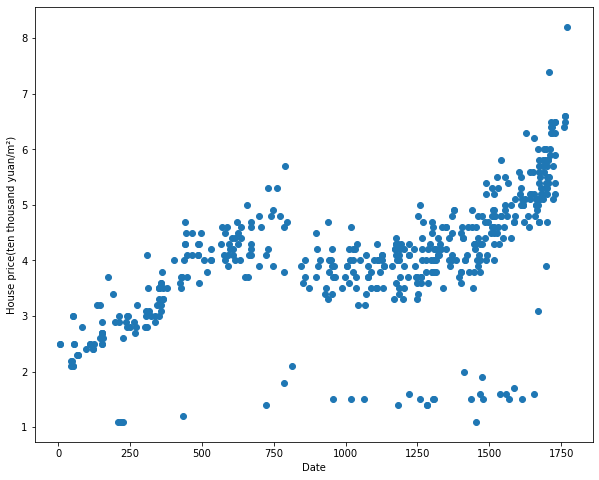

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(data.time,data.cjdanjia)
plt.xlabel("Date")
plt.ylabel("House price(ten thousand yuan/m²)")

#### 引入模型库

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#### 对数据去重

目前，模型1和2考虑的是自变量时间与因变量单价的关系。模型3将自变量扩展到多个

In [24]:
data_line=data[['time','cjdanjia']]

查看重复数据数

In [25]:
data_line.duplicated().sum()

32

数据去重

In [26]:
data_line=data_line.drop_duplicates()

#### 生成数据集

In [27]:
x = data_line['time'].values.reshape(-1, 1)
y = data_line['cjdanjia'].values.reshape(-1, 1)

#### 划分数据集为训练集和测试集

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#### 建立模型1~线性回归（一元）

In [30]:
model1 = LinearRegression()
model1.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 模型1预测

In [31]:
y_predict1=model1.predict(x)

#### 模型1结果可视化

Text(0, 0.5, 'House price(ten thousand yuan/m²)')

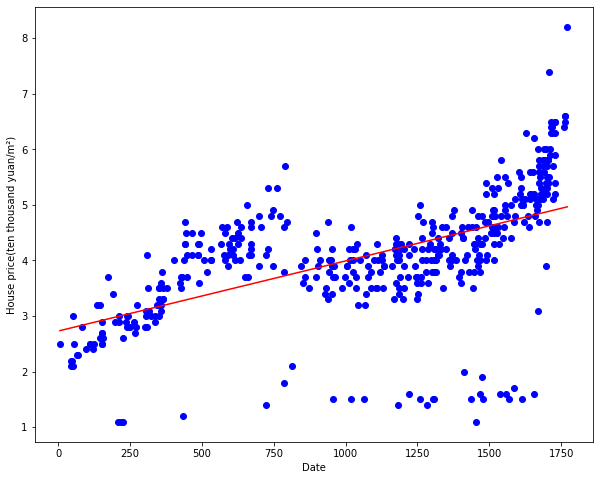

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(x, y, color = 'blue')
plt.plot(x, model1.predict(x), color = 'red')
plt.xlabel("Date")
plt.ylabel("House price(ten thousand yuan/m²)")

#### 模型1评价

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mse=mean_squared_error(y,y_predict1)
print("模型1均方误差:",mse)

模型1均方误差: 0.8592169319533419


#### 建立模型2~线性回归（多项式）

In [35]:
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(x)
model2 = LinearRegression()
model2.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 模型2预测

In [36]:
y_predict2=model2.predict(poly_reg.fit_transform(x))

#### 模型2结果可视化

Text(0, 0.5, 'House price(ten thousand yuan/m²)')

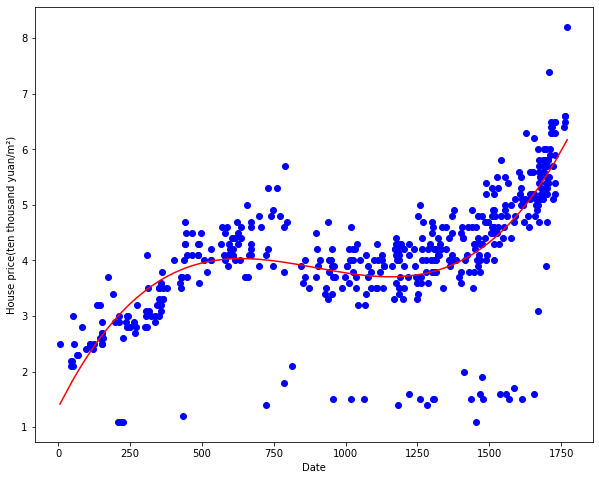

In [37]:
plt.figure(figsize=(10,8))
plt.scatter(x, y, color='blue')
plt.plot(x, model2.predict(x_poly),color='red')
plt.xlabel("Date")
plt.ylabel("House price(ten thousand yuan/m²)")

#### 模型2评价

In [38]:
mse=mean_squared_error(y,y_predict2)
print("模型2均方误差:",mse)

模型2均方误差: 0.62436202895849


#### 建立模型3~多元线性回归

模型1和模型2，目前自变量只考虑了时间，我们先对数据进行一下处理，将自变量扩展到多个，看一下模型的拟合效果

#### 数据处理

#### 1.处理cjxiaoqu

In [39]:
data_cjxiaoqu=data.cjxiaoqu.str.split(' ',expand=True)

In [40]:
data_cjxiaoqu=data_cjxiaoqu.rename(columns={0:'xiaoqu',1:'tingshi',2:'area'})

In [41]:
data_cjxiaoqu.area = data_cjxiaoqu.area.str.replace('平','').astype('float')

In [42]:
data=pd.concat([data,data_cjxiaoqu],axis=1)

#### 2.处理cjlouceng

In [43]:
data_cjlouceng=data.cjlouceng.str.split('/',expand=True)

In [44]:
data_cjlouceng=data_cjlouceng.rename(columns={0:'chaoxiang',1:'loucenglevel',2:'louceng'})

In [45]:
data_cjlouceng.louceng = data_cjlouceng.louceng.str.replace('层','').astype('int')

In [46]:
data=pd.concat([data,data_cjlouceng],axis=1)

###### one-hot编码

one-hot编码（独热编码）：采用N位状态寄存器来对N个状态进行编码，每个状态都有他独立的寄存器位，并且在任意时候只有一位有效。

房屋朝向，种类比较多。目前只按照是否有朝“南”的为标准，有则设置为1，否则为0

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
data.chaoxiang=[1 if x else 0 for x in data.chaoxiang.str.contains("南")]

楼层高低：高中低

In [49]:
data['loucenggao']=np.array(data['loucenglevel']=='高楼层').astype(np.int32)

In [50]:
data['loucengzhong']=np.array(data['loucenglevel']=='中楼层').astype(np.int32)

In [51]:
data['loucengdi']=np.array(data['loucenglevel']=='低楼层').astype(np.int32)

In [52]:
del data['cjlouceng']
del data['loucenglevel']

In [53]:
data.head()

,cjtaoshu,mendian,cjzongjia,zhiwei,haoping,cjdanjia,cjxiaoqu,xingming,cjzhouqi,biaoqian,...,bankuai,time,xiaoqu,tingshi,area,chaoxiang,louceng,loucenggao,loucengzhong,loucengdi
cjshijian,,,,,,,,,,,,,,,,,,,,,
2012-01-07,32,远洋山水中街店,180.0,店经理,99% 122,2.5,远洋山水 1室1厅 70平,卢德强,28,房东信赖;销售达人;带看活跃;海外顾问,...,鲁谷,6,远洋山水,1室1厅,70.0,0,26,0,1,0
2012-01-07,32,远洋山水中街店,180.0,店经理,99% 122,2.5,远洋山水 1室1厅 70平,卢德强,28,房东信赖;销售达人;带看活跃;海外顾问,...,鲁谷,6,远洋山水,1室1厅,70.0,0,26,0,1,0
2012-02-13,42,远洋山水中街店,235.0,店经理,95% 134,2.2,远洋山水 2室2厅 105平,乔璐璐,72,房东信赖;销售达人,...,鲁谷,43,远洋山水,2室2厅,105.0,1,24,0,1,0
2012-02-15,35,远洋山水一店,222.0,经纪人,95% 113,2.1,远洋山水 2室1厅 107平,冯丽琴,22,房东信赖;销售达人,...,鲁谷,45,远洋山水,2室1厅,107.0,0,26,0,1,0
2012-02-19,25,远洋山水东门店,122.0,店经理,100% 109,2.2,远洋山水 1室1厅 54平,成蕾,72,房东信赖;客户热评,...,鲁谷,49,远洋山水,1室1厅,54.0,0,26,0,0,1


In [54]:
data['cjzhouqi']=data['cjzhouqi'].astype('int')
data = data[['cjdanjia','time','area','louceng','chaoxiang','cjzhouqi','cjtaoshu','loucenggao','loucengzhong','loucengdi']]
x = data[['time','area','louceng','chaoxiang','cjzhouqi','cjtaoshu','loucenggao','loucengzhong','loucengdi']]
y = data['cjdanjia']

相关性分析-自变量与因变量的相关性分析：热力图

corr():计算相关系数

heatmap(): linewidths,热力图矩阵之间的间隔大小 annot,默认为False，当annot为True时，在heatmap中每个方格写入数据 square:是否是正方形

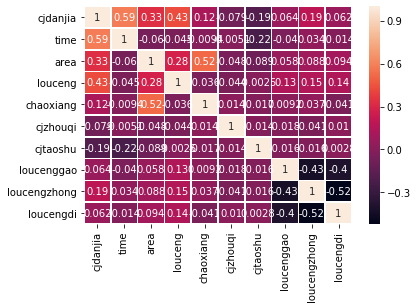

In [55]:
import seaborn as sns
corrmat = data.corr()
sns.heatmap(corrmat, square=False, linewidths=.5, annot=True)

In [56]:
print(corrmat["cjdanjia"].sort_values(ascending=False))

cjdanjia        1.000000
time            0.587511
louceng         0.431028
area            0.330899
loucengzhong    0.186243
chaoxiang       0.121613
loucenggao      0.063763
loucengdi       0.062397
cjzhouqi       -0.078917
cjtaoshu       -0.188449
Name: cjdanjia, dtype: float64


通过热力图可以看出，cjzhouqi和cjtaoshu的相关系数为负数，故将其去除

In [57]:
x = data[['time','area','louceng','chaoxiang','loucenggao','loucengzhong','loucengdi']]
model3 = LinearRegression()
model3.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 模型3预测

In [58]:
y_predict3=model3.predict(x)

#### 模型3结果可视化

#### 模型3评价

In [59]:
mse=mean_squared_error(y,y_predict3)
print("模型3均方误差:",mse)

模型3均方误差: 0.359186993023371


#### 反向淘汰 P>|t|最大，先去除

In [60]:
import statsmodels.api as sm

In [61]:
x_data=data[['time','area','louceng','chaoxiang','loucenggao','loucengzhong']]

由于标准库中的函数是不包含常数项的，所以需要手动加上一列

In [62]:
x_data = np.append(arr = np.ones((x_data.shape[0], 1)).astype(int), values = x_data, axis = 1)

In [63]:
x_opt = x_data  [:, [0, 1, 2, 3, 4, 5,6,]]
regressor_OLS = sm.OLS(endog = y, exog = x_opt ).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               cjdanjia   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     133.9
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           1.25e-98
Time:                        17:32:53   Log-Likelihood:                -501.44
No. Observations:                 480   AIC:                             1017.
Df Residuals:                     473   BIC:                             1046.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0072      0.165     -0.044      0.965      -0.331       0.316
x1             0.0014   6.14e-05     21.996      0.000       0.001       0.001
x2             0.0081      0.001      7.095      0.000       0.006       0.010
x3             0.0727      0.006     11.716      0.000       0.061       0.085
x4             0.0099      0.076      0.130      0.897      -0.140       0.160
x5             0.2034      0.083      2.439      0.015       0.040       0.367
x6             0.2886      0.075      3.840      0.000       0.141       0.436
==============================================================================
Omnibus:                       16.282   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.675
Skew:                           0.022   Prob(JB):                     1.09e-08
Kurtosis:                       4.353   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
x_opt = x_data  [:, [1, 2, 3,4, 5,6]]
regressor_OLS = sm.OLS(endog = y, exog = x_opt ).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               cjdanjia   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              2900.
Date:                Mon, 30 Sep 2019   Prob (F-statistic):                        0.00
Time:                        17:32:53   Log-Likelihood:                         -501.44
No. Observations:                 480   AIC:                                      1015.
Df Residuals:                     474   BIC:                                      1040.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0013   5.48e-05     24.630      0.000       0.001       0.001
x2             0.0081      0.001      7.229      0.000       0.006       0.010
x3             0.0725      0.004     16.733      0.000       0.064       0.081
x4             0.0096      0.076      0.127      0.899      -0.140       0.159
x5             0.2034      0.083      2.441      0.015       0.040       0.367
x6             0.2886      0.075      3.845      0.000       0.141       0.436
==============================================================================
Omnibus:                       16.282   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.680
Skew:                           0.021   Prob(JB):                     1.08e-08
Kurtosis:                       4.354   Cond. No.                     3.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
x_opt = x_data  [:, [1, 2, 3,5,6]]
regressor_OLS = sm.OLS(endog = y, exog = x_opt ).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               cjdanjia   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              3487.
Date:                Mon, 30 Sep 2019   Prob (F-statistic):                        0.00
Time:                        17:32:53   Log-Likelihood:                         -501.45
No. Observations:                 480   AIC:                                      1013.
Df Residuals:                     475   BIC:                                      1034.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0013   5.46e-05     24.706      0.000       0.001       0.001
x2             0.0081      0.001      8.987      0.000       0.006       0.010
x3             0.0724      0.004     17.232      0.000       0.064       0.081
x4             0.2035      0.083      2.446      0.015       0.040       0.367
x5             0.2888      0.075      3.853      0.000       0.142       0.436
==============================================================================
Omnibus:                       16.035   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.745
Skew:                           0.026   Prob(JB):                     1.73e-08
Kurtosis:                       4.336   Cond. No.                     3.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
x_opt = x_data  [:, [ 1, 2, 3,6]]
regressor_OLS = sm.OLS(endog = y, exog = x_opt ).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               cjdanjia   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              4312.
Date:                Mon, 30 Sep 2019   Prob (F-statistic):                        0.00
Time:                        17:32:53   Log-Likelihood:                         -504.46
No. Observations:                 480   AIC:                                      1017.
Df Residuals:                     476   BIC:                                      1034.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0013   5.49e-05     24.545      0.000       0.001       0.001
x2             0.0082      0.001      9.075      0.000       0.006       0.010
x3             0.0754      0.004     18.655      0.000       0.067       0.083
x4             0.2051      0.067      3.059      0.002       0.073       0.337
==============================================================================
Omnibus:                       18.081   Durbin-Watson:                   0.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.606
Skew:                          -0.008   Prob(JB):                     3.40e-10
Kurtosis:                       4.476   Cond. No.                     2.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
x_opt = x_data  [:, [ 1, 2, 3]]
regressor_OLS = sm.OLS(endog = y, exog = x_opt ).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               cjdanjia   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              5648.
Date:                Mon, 30 Sep 2019   Prob (F-statistic):                        0.00
Time:                        17:32:53   Log-Likelihood:                         -509.13
No. Observations:                 480   AIC:                                      1024.
Df Residuals:                     477   BIC:                                      1037.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0014   5.53e-05     24.488      0.000       0.001       0.001
x2             0.0084      0.001      9.161      0.000       0.007       0.010
x3             0.0776      0.004     19.350      0.000       0.070       0.085
==============================================================================
Omnibus:                       20.912   Durbin-Watson:                   1.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.505
Skew:                          -0.025   Prob(JB):                     8.86e-13
Kurtosis:                       4.665   Cond. No.                         152.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 模型3调整

In [68]:
x=data[['time','area','louceng']]

In [69]:
model3_change = LinearRegression()
model3_change.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
y_predict3_change=model3_change.predict(x)

In [71]:
mse=mean_squared_error(y,y_predict3_change)
print("调整后的模型3均方误差:",mse)

调整后的模型3均方误差: 0.4884510975921369


模型3，调整后误差反而上升了。

# 四、结论
对比上述模型，给出结论（至少3条，不要定性分析，要定量分析）

答：1）模型1，模型2和模型3的均方误差分别为0.85,0.62,0.35,其中模型3的MSE最低，综上模型3的预测效果最好

2）根据热力图，可以得到房价相关性
cjdanjia        1.000000
time            0.587511
louceng         0.431028
area            0.330899
loucengzhong    0.186243
chaoxiang       0.121613
loucenggao      0.063763
loucengdi       0.062397
cjzhouqi       -0.078917
cjtaoshu       -0.188449
影响房价最主要的因素是时间。

3）房价预测

In [73]:
#预测2012年1月1日1800天后，远洋山水小区中层(10层)的面积为100平朝南的房价
x = np.array([[1800,100,10,1,0,1,0]])
y = model3.predict(x)
print('预测单价: {} 万元/平'.format(y))

预测单价: [5.3522206] 万元/平
